In [1]:
import os
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import zipfile
import pickle



In [6]:

def unzip_file(zip_path, extract_path):
    """
    Extracts all files from a zip archive.

    Args:
        zip_path (str): The path to the zip file.
        extract_path (str): The directory to extract the files to. 
                           If None, it will extract to the current directory.
    """
    try:
        with zipfile.ZipFile(zip_path, 'r') as zip_ref:
            zip_ref.extractall(extract_path)
        print(f"Successfully extracted '{zip_path}' to '{extract_path}'")
    except FileNotFoundError:
        print(f"Error: Zip file '{zip_path}' not found.")
    except zipfile.BadZipFile:
         print(f"Error: '{zip_path}' is not a valid zip file.")
    except Exception as e:
        print(f"An error occurred: {e}")
        
zip_file_path = '../Dataset/alarms_log_data.zip'
extract_location = 'dataset'
unzip_file(zip_file_path, extract_location)

Successfully extracted '../Dataset/alarms_log_data.zip' to 'dataset'


In [7]:
df = pd.read_csv("C:/Users/Niranjan kumar/Desktop/SPRING 2025/Predictive Maintenance/Capstone/Forecasting_model/dataset/alarms_log_data/raw/alarms.csv")
df

,timestamp,alarm,serial
0,2019-02-21 19:57:57.532,139,4
1,2019-02-21 19:58:28.293,139,4
2,2019-02-21 19:58:32.853,139,4
3,2019-02-21 19:59:05.387,139,4
4,2019-02-21 20:02:05.832,139,4
...,...,...,...
444829,2020-06-15 22:53:05.303,139,19
444830,2020-06-15 22:56:19.633,139,19
444831,2020-06-15 23:03:16.854,139,19
444832,2020-06-15 23:03:50.454,139,19


In [8]:

# Check for missing values
missing_values = df.isnull().sum()
print("Missing values in each column:")
print(missing_values)


Missing values in each column:
timestamp    0
alarm        0
serial       0
dtype: int64


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 444834 entries, 0 to 444833
Data columns (total 3 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   timestamp  444834 non-null  object
 1   alarm      444834 non-null  int64 
 2   serial     444834 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 10.2+ MB


In [10]:
df['alarm'].value_counts()

alarm
98     90762
11     60994
26     57320
137    57273
139    48551
       ...  
147        1
62         1
125        1
81         1
59         1
Name: count, Length: 154, dtype: int64

In [11]:
df['serial'].value_counts()

serial
6     59357
7     50683
10    49670
3     42387
13    37022
0     36129
12    26068
14    24399
9     22178
5     18646
2     17399
1     14509
8     10972
15     9620
17     8872
11     8202
16     3569
18     2813
4      2118
19      221
Name: count, dtype: int64

In [12]:
# Change timestamp to datetime
df['timestamp'] = pd.to_datetime(df['timestamp'], format='%Y-%m-%d %H:%M:%S.%f')
df.head()


,timestamp,alarm,serial
0,2019-02-21 19:57:57.532,139,4
1,2019-02-21 19:58:28.293,139,4
2,2019-02-21 19:58:32.853,139,4
3,2019-02-21 19:59:05.387,139,4
4,2019-02-21 20:02:05.832,139,4


In [13]:
df = df.sort_values(by='timestamp')
df['timestamp'] = df['timestamp'].dt.floor('S')  # Round down to the nearest second
df.head()

C:\Users\Niranjan kumar\AppData\Local\Temp\ipykernel_9964\3676491796.py:2: FutureWarning: 'S' is deprecated and will be removed in a future version, please use 's' instead.
  df['timestamp'] = df['timestamp'].dt.floor('S')  # Round down to the nearest second


,timestamp,alarm,serial
39140,2019-02-21 10:16:18,139,3
39141,2019-02-21 10:16:59,139,3
39142,2019-02-21 10:18:41,139,3
39143,2019-02-21 10:19:24,139,3
39144,2019-02-21 10:20:06,139,3


In [14]:
df = df.reset_index(drop=True)
df.head()

,timestamp,alarm,serial
0,2019-02-21 10:16:18,139,3
1,2019-02-21 10:16:59,139,3
2,2019-02-21 10:18:41,139,3
3,2019-02-21 10:19:24,139,3
4,2019-02-21 10:20:06,139,3


# Feature Engineering

In [15]:
# Extract date-based features
df['date'] = df['timestamp'].dt.date
df['time'] = df['timestamp'].dt.time
df['hour'] = df['timestamp'].dt.hour
df['minute'] = df['timestamp'].dt.minute
df['second'] = df['timestamp'].dt.second
df['day_of_week'] = df['timestamp'].dt.day_name()
df['day_of_year'] = df['timestamp'].dt.dayofyear
df['week_of_year'] = df['timestamp'].dt.isocalendar().week
df['month'] = df['timestamp'].dt.month
df['year'] = df['timestamp'].dt.year
df['quarter'] = df['timestamp'].dt.quarter

In [16]:
df.head()

,timestamp,alarm,serial,date,time,hour,minute,second,day_of_week,day_of_year,week_of_year,month,year,quarter
0,2019-02-21 10:16:18,139,3,2019-02-21,10:16:18,10,16,18,Thursday,52,8,2,2019,1
1,2019-02-21 10:16:59,139,3,2019-02-21,10:16:59,10,16,59,Thursday,52,8,2,2019,1
2,2019-02-21 10:18:41,139,3,2019-02-21,10:18:41,10,18,41,Thursday,52,8,2,2019,1
3,2019-02-21 10:19:24,139,3,2019-02-21,10:19:24,10,19,24,Thursday,52,8,2,2019,1
4,2019-02-21 10:20:06,139,3,2019-02-21,10:20:06,10,20,6,Thursday,52,8,2,2019,1


In [17]:
# Encode weekend & weekday
df['is_weekend'] = df['day_of_week'].isin(['Saturday', 'Sunday']).astype(int)
df['is_weekday'] = df['day_of_week'].isin(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday']).astype(int)

# Time-of-day encoding
df['is_morning'] = df['hour'].between(5, 11).astype(int)
df['is_afternoon'] = df['hour'].between(12, 17).astype(int)
df['is_evening'] = df['hour'].between(18, 21).astype(int)
df['is_night'] = ((df['hour'] >= 22) | (df['hour'] <= 4)).astype(int)

In [18]:
df.head()

,timestamp,alarm,serial,date,time,hour,minute,second,day_of_week,day_of_year,week_of_year,month,year,quarter,is_weekend,is_weekday,is_morning,is_afternoon,is_evening,is_night
0,2019-02-21 10:16:18,139,3,2019-02-21,10:16:18,10,16,18,Thursday,52,8,2,2019,1,0,1,1,0,0,0
1,2019-02-21 10:16:59,139,3,2019-02-21,10:16:59,10,16,59,Thursday,52,8,2,2019,1,0,1,1,0,0,0
2,2019-02-21 10:18:41,139,3,2019-02-21,10:18:41,10,18,41,Thursday,52,8,2,2019,1,0,1,1,0,0,0
3,2019-02-21 10:19:24,139,3,2019-02-21,10:19:24,10,19,24,Thursday,52,8,2,2019,1,0,1,1,0,0,0
4,2019-02-21 10:20:06,139,3,2019-02-21,10:20:06,10,20,6,Thursday,52,8,2,2019,1,0,1,1,0,0,0


In [19]:
df.describe()

,timestamp,alarm,serial,hour,minute,second,day_of_year,week_of_year,month,year,quarter,is_weekend,is_weekday,is_morning,is_afternoon,is_evening,is_night
count,444834,444834.000000,444834.000000,444834.000000,444834.000000,444834.000000,444834.000000,444834.0,444834.000000,444834.000000,444834.000000,444834.000000,444834.000000,444834.000000,444834.000000,444834.000000,444834.000000
mean,2019-10-30 08:32:08.063668992,69.071004,7.657108,11.186123,29.609594,29.511759,166.877984,24.330283,5.998109,2019.372577,2.320385,0.237477,0.762523,0.348789,0.305255,0.128331,0.217625
min,2019-02-21 10:16:18,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.0,1.000000,2019.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2019-07-06 01:20:50.750000128,26.000000,4.000000,6.000000,15.000000,15.000000,86.000000,13.0,3.000000,2019.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,2019-11-05 02:08:01,45.000000,7.000000,11.000000,30.000000,30.000000,147.000000,22.0,5.000000,2019.000000,2.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,2020-02-25 15:07:32.500000,119.000000,12.000000,16.000000,45.000000,45.000000,254.000000,37.0,9.000000,2020.000000,3.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000
max,2020-06-17 03:53:51,153.000000,19.000000,23.000000,59.000000,59.000000,365.000000,52.0,12.000000,2020.000000,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
std,NaN,49.876903,4.594188,6.108514,17.302363,17.307179,99.449007,14.139765,3.274238,0.483491,1.077358,0.425538,0.425538,0.476587,0.460516,0.334458,0.412631


In [22]:
df

,timestamp,alarm,serial,date,time,hour,minute,second,day_of_week,day_of_year,week_of_year,month,year,quarter,is_weekend,is_weekday,is_morning,is_afternoon,is_evening,is_night
0,2019-02-21 10:16:18,139,3,2019-02-21,10:16:18,10,16,18,Thursday,52,8,2,2019,1,0,1,1,0,0,0
1,2019-02-21 10:16:59,139,3,2019-02-21,10:16:59,10,16,59,Thursday,52,8,2,2019,1,0,1,1,0,0,0
2,2019-02-21 10:18:41,139,3,2019-02-21,10:18:41,10,18,41,Thursday,52,8,2,2019,1,0,1,1,0,0,0
3,2019-02-21 10:19:24,139,3,2019-02-21,10:19:24,10,19,24,Thursday,52,8,2,2019,1,0,1,1,0,0,0
4,2019-02-21 10:20:06,139,3,2019-02-21,10:20:06,10,20,6,Thursday,52,8,2,2019,1,0,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
444829,2020-06-17 03:17:18,138,0,2020-06-17,03:17:18,3,17,18,Wednesday,169,25,6,2020,2,0,1,0,0,0,1
444830,2020-06-17 03:28:51,138,0,2020-06-17,03:28:51,3,28,51,Wednesday,169,25,6,2020,2,0,1,0,0,0,1
444831,2020-06-17 03:28:59,138,0,2020-06-17,03:28:59,3,28,59,Wednesday,169,25,6,2020,2,0,1,0,0,0,1
444832,2020-06-17 03:36:20,32,9,2020-06-17,03:36:20,3,36,20,Wednesday,169,25,6,2020,2,0,1,0,0,0,1


In [24]:
df.resample("T", on="timestamp").count()["alarm"]

C:\Users\Niranjan kumar\AppData\Local\Temp\ipykernel_9964\2074690479.py:1: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  df.resample("T", on="timestamp").count()["alarm"]


timestamp
2019-02-21 10:16:00    2
2019-02-21 10:17:00    0
2019-02-21 10:18:00    1
2019-02-21 10:19:00    1
2019-02-21 10:20:00    1
                      ..
2020-06-17 03:49:00    0
2020-06-17 03:50:00    0
2020-06-17 03:51:00    0
2020-06-17 03:52:00    0
2020-06-17 03:53:00    1
Freq: min, Name: alarm, Length: 693698, dtype: int64

ConversionError: Failed to convert value(s) to axis units: array([datetime.time(10, 16, 18), datetime.time(10, 16, 59),
       datetime.time(10, 18, 41), ..., datetime.time(3, 28, 59),
       datetime.time(3, 36, 20), datetime.time(3, 53, 51)], dtype=object)

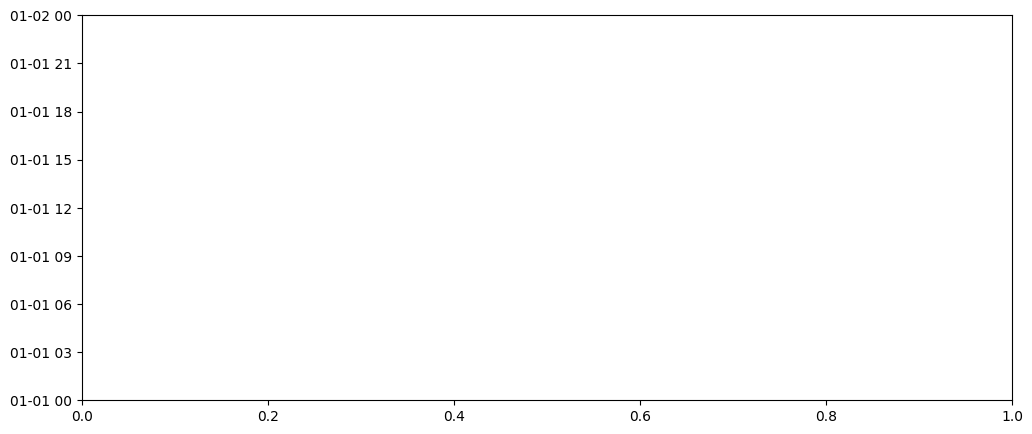

In [ ]:
### 1. Plot Time Series
plt.figure(figsize=(12, 5))
plt.plot(df, label="alarm", color='blue')
plt.xlabel("Time")
plt.ylabel("Number of Alarms")
plt.title("Time Series of Alarms")
plt.legend()
plt.show()